### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

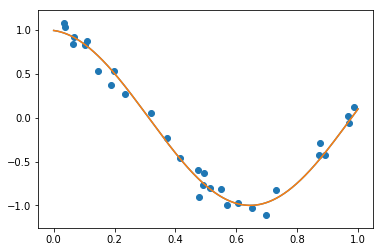

In [2]:
# Define the function to generate data points
x = np.linspace(0, 1, 10000)
y = np.cos(1.5*np.pi*x + 0.1)
plt.plot(x,y)

# Initialize random seed
random.seed(0)
# Generate noisy data points: (x,y)
noise = np.random.normal(0,0.1,30)
x_rand = np.random.uniform(0,1,30)
sampled = np.cos(1.5*np.pi*x_rand + 0.1) + noise

# Plot true model and sampled data points
plt.scatter(x_rand, sampled)
plt.plot(x,y)
plt.show()


## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

w0 = 0.5742282231041583 and w1 = [-1.49464823]


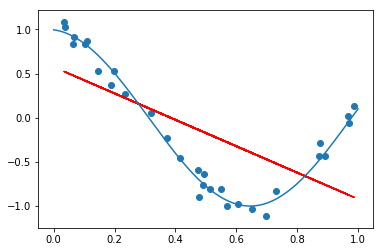

In [3]:
# Fit a linear model in the original space
model = LinearRegression()

# fit model and predict
model.fit(x_rand.reshape(-1, 1),sampled)
predictions = model.predict(x_rand.reshape(-1,1))

#To retrieve the intercept:
w0 = model.intercept_
w1 = model.coef_
print("w0 = {} and w1 = {}".format(w0,w1))

# Plot fitted linear model
plt.plot(x_rand,predictions,color='red')
plt.scatter(x_rand, sampled)
plt.plot(x,y)
plt.show()

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

[ 0.00000000e+00 -4.91670310e+02  1.37774913e+04 -2.09664134e+05
  1.96640959e+06 -1.22497706e+07  5.30086747e+07 -1.63560070e+08
  3.64431081e+08 -5.87056141e+08  6.76355809e+08 -5.42692707e+08
  2.87722393e+08 -9.05135552e+07  1.27842477e+07]


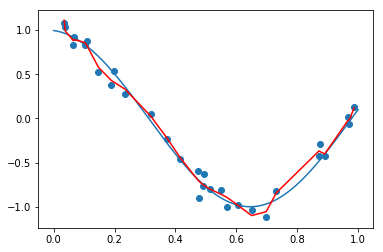

In [4]:
# Augment the original feature to a 15-vector
poly_feat = PolynomialFeatures(degree=14)
X_trans = poly_feat.fit_transform(x_rand.reshape(-1,1))

# Fit linear model to the generated 15-vector features
lin_model = LinearRegression()
lin_model.fit(X_trans,sampled)
poly_predict = lin_model.predict(X_trans)

w = lin_model.coef_
print(w)

# Plot fitted curve and sampled data points
ii = x_rand.argsort()
xx = x_rand[ii]
y_predict = poly_predict[ii]

plt.scatter(x_rand, sampled)
plt.plot(x,y)
plt.plot(xx, y_predict, color='red')
plt.show()

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

[ 0.         -4.24448068 -0.          0.          2.43100113  1.23932842
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.43491254]


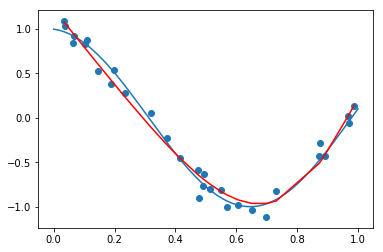

In [5]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
lasso_model = linear_model.Lasso(alpha=0.001,max_iter=1e4)
lasso_model.fit(X_trans,sampled)
lasso_predict = lasso_model.predict(X_trans)

w = lasso_model.coef_
print(w)

# Plot fitted curve and sampled data points
ii = x_rand.argsort()
xx = x_rand[ii]
lasso_predict = lasso_predict[ii]

plt.scatter(x_rand, sampled)
plt.plot(x,y)
plt.plot(xx, lasso_predict, color='red')
plt.show()

In [6]:
# Since many of the w's are zero for the lasso model, the data will not be over fitted, as before, there was a parameter
# for every degree of freedom (15) and the model was over fitted